# 1. Import Libraries

In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


2. Load Dataset

In [3]:
# Assuming files are in the current directory
train = pd.read_csv("D:/AR/personal projects/ML projects/regression/train.csv")
test = pd.read_csv("D:/AR/personal projects/ML projects/regression/test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (1460, 81)
Test shape: (1459, 80)


3. Exploratory Data Analysis (EDA)

In [4]:
# Preview data
print(train.head(10))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...       

In [5]:
# Check info and missing values
print(train.info())
print(train.isnull().sum().sort_values(ascending=False).head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Summary stats
print(train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

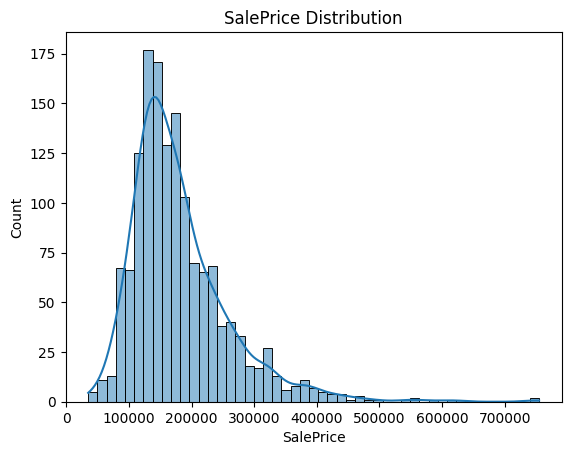

In [7]:
# Target variable distribution
sns.histplot(train['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.show()

In [8]:
# Log transform if skewed
train['SalePrice'] = np.log1p(train['SalePrice'])

4. Data Cleaning & Preprocessing

In [9]:
# Combine train & test for preprocessing (exclude SalePrice from train)
all_data = pd.concat([train.drop('SalePrice', axis=1), test], axis=0).reset_index(drop=True)

In [10]:

# Handle missing values for numerical variables - fill with median
for col in all_data.select_dtypes(include=[np.number]).columns:
    all_data[col] = all_data[col].fillna(all_data[col].median())

5. Feature Engineering & Encoding

In [11]:
# Encode categorical variables using Label Encoding (if ordinal)
# For simplicity, use One-Hot Encoding here

all_data = pd.get_dummies(all_data)

print("All data shape after encoding:", all_data.shape)


All data shape after encoding: (2919, 288)


6. Split Back Train and Test

In [12]:
X_train = all_data.iloc[:len(train), :]
X_test = all_data.iloc[len(train):, :]

y_train = train['SalePrice']

In [13]:
print(y_train)

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64


In [14]:
from sklearn.model_selection import train_test_split

7. Split Training Data for Validation

In [15]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

8. Model Selection and Training

In [16]:
# Example: Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_tr, y_tr)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


9. Model Evaluation

In [17]:
# Predict on validation set
y_val_pred = model.predict(X_val)

# Calculate metrics
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Validation MAE: {mae:.4f}")
print(f"Validation RMSE: {rmse:.4f}")
print(f"Validation R^2 Score: {r2:.4f}")


Validation MAE: 0.0996
Validation RMSE: 0.1453
Validation R^2 Score: 0.8869


10. Predict on Test Set and Prepare Submission

In [18]:
y_test_pred = model.predict(X_test)

# Since target was log-transformed, reverse it
y_test_pred_exp = np.expm1(y_test_pred)

submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": y_test_pred_exp
})

submission.to_csv("submission.csv", index=False)
print("Submission file created!")

Submission file created!


1. Make sure the new data is prepared the same way as training data


2. Convert the new data into a DataFrame


In [19]:
new_house = {
    'LotArea': 9000,
    'OverallQual': 7,
    'YearBuilt': 2000,
    'Neighborhood': 'CollgCr',
    'HouseStyle': '2Story',
    # Add all features you used in training
}
new_df = pd.DataFrame([new_house])


3. Preprocess the new data


In [20]:
# Fill missing categories
for col in new_df.select_dtypes(include='object').columns:
    new_df[col] = new_df[col].fillna('Missing')

# Combine with train data to get all dummy columns
combined = pd.concat([all_data.iloc[:len(train), :], new_df], axis=0)
combined = pd.get_dummies(combined)

# Align columns to training data
combined = combined.reindex(columns=all_data.columns, fill_value=0)

# Extract new data row only
final_input = combined.tail(1)


4. Predict

In [21]:
predicted_log_price = model.predict(final_input)[0]  # if you log-transformed target during training
predicted_price = np.expm1(predicted_log_price)      # reverse log transform

print(f"Predicted House Price: ${predicted_price:.2f}")


Predicted House Price: $182450.67
